# Bigrams from scratch


#### We first read a file that contains a bunch of names.


In [1]:
words = open("names.txt", "r").read().splitlines()


#### There are 32033 names.


In [2]:
len(words)


32033

#### Here are some examples.


In [3]:
words[:5]


['emma', 'olivia', 'ava', 'isabella', 'sophia']

#### In Bigrams, we use a character to predict its next character.

#### Let's see how many combinations (charactor-charactor pair) are there.


In [4]:
b = {}
for w in words:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1


#### The mapping looks like this.


In [5]:
b


{('.', 'e'): 1531,
 ('e', 'm'): 769,
 ('m', 'm'): 168,
 ('m', 'a'): 2590,
 ('a', '.'): 6640,
 ('.', 'o'): 394,
 ('o', 'l'): 619,
 ('l', 'i'): 2480,
 ('i', 'v'): 269,
 ('v', 'i'): 911,
 ('i', 'a'): 2445,
 ('.', 'a'): 4410,
 ('a', 'v'): 834,
 ('v', 'a'): 642,
 ('.', 'i'): 591,
 ('i', 's'): 1316,
 ('s', 'a'): 1201,
 ('a', 'b'): 541,
 ('b', 'e'): 655,
 ('e', 'l'): 3248,
 ('l', 'l'): 1345,
 ('l', 'a'): 2623,
 ('.', 's'): 2055,
 ('s', 'o'): 531,
 ('o', 'p'): 95,
 ('p', 'h'): 204,
 ('h', 'i'): 729,
 ('.', 'c'): 1542,
 ('c', 'h'): 664,
 ('h', 'a'): 2244,
 ('a', 'r'): 3264,
 ('r', 'l'): 413,
 ('l', 'o'): 692,
 ('o', 't'): 118,
 ('t', 't'): 374,
 ('t', 'e'): 716,
 ('e', '.'): 3983,
 ('.', 'm'): 2538,
 ('m', 'i'): 1256,
 ('a', 'm'): 1634,
 ('m', 'e'): 818,
 ('.', 'h'): 874,
 ('r', 'p'): 14,
 ('p', 'e'): 197,
 ('e', 'r'): 1958,
 ('r', '.'): 1377,
 ('e', 'v'): 463,
 ('v', 'e'): 568,
 ('l', 'y'): 1588,
 ('y', 'n'): 1826,
 ('n', '.'): 6763,
 ('b', 'i'): 217,
 ('i', 'g'): 428,
 ('g', 'a'): 330,
 ('a',

#### Sorting by frequency, we see top 10 most frequent pairs (of characters).


In [6]:
sorted(b.items(), key=lambda kv: -kv[1])[:10]


[(('n', '.'), 6763),
 (('a', '.'), 6640),
 (('a', 'n'), 5438),
 (('.', 'a'), 4410),
 (('e', '.'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('.', 'k'), 2963)]

#### We see that there are 26 characters used in the name list.


In [7]:
chars = sorted(list(set("".join(words))))


In [8]:
#### No upper-cases, but only lower-cases.


In [9]:
chars


['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [10]:
n_chars = len(chars) + 1


#### In order to work with characters, we need to convert them to some numbers.

#### So let's create encoding / decoding maps.


In [11]:
stoi = {s: i + 1 for i, s in enumerate(chars)}  # string to integer
stoi["."] = 0  # special character to indicate start/end of names
itos = {i: s for s, i in stoi.items()}  # integer to string


#### Which gives:


In [12]:
stoi


{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [13]:
itos


{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

#### Now, we are going to visualize the frequency of bigrams


#### First, prepare a 27-by-27 table. Each cell indicates each character-character pair.


In [14]:
import torch

N = torch.zeros((n_chars, n_chars), dtype=torch.int32)


#### Second, we put the frequency or each cell


In [15]:
for (ch1, ch2), freq in b.items():
    N[stoi[ch1], stoi[ch2]] = freq


#### Here is the table.


In [16]:
N


tensor([[   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
         1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
          134,  535,  929],
        [6640,  556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568,
         2528, 1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,
          182, 2050,  435],
        [ 114,  321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,
          103,    0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,
            0,   83,    0],
        [  97,  815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,
          116,    0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,
            3,  104,    4],
        [ 516, 1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,
           60,   30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,
            0,  317,    1],
        [3983,  679,  121,  153,  384, 1271,   82,

#### Let's visualize the table by colors.


#### For example, "an" ("a" followed by "n") is pretty popular choice (in terms of frequency)


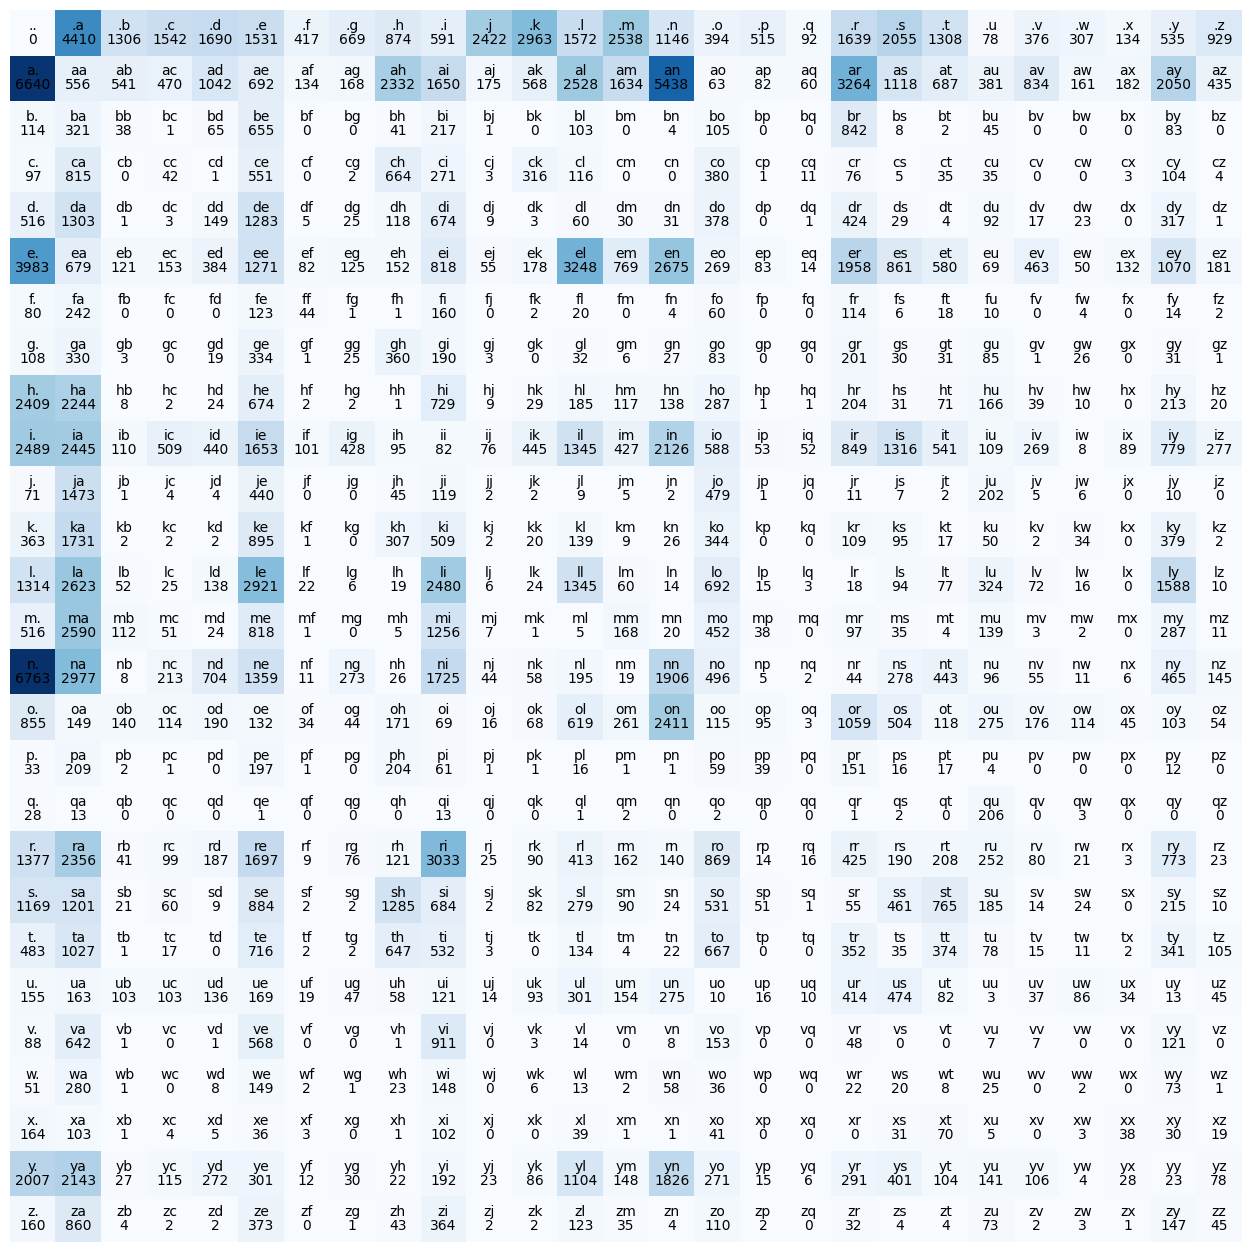

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(n_chars):
    for j in range(n_chars):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='k')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='k')
plt.axis('off');

#### Now, we would like to convert the frequency into likelihood (probability), by normalizing it.


In [18]:
P = N.float()
P /= P.sum(1, keepdim=True)  # keepdim=True is necessary for proper normalization.


#### The likelihood (probability) table looks like this.

#### For example, "qu" has 76\%. This means that if the previous character is "q", then the next character is highly likely to be "u".


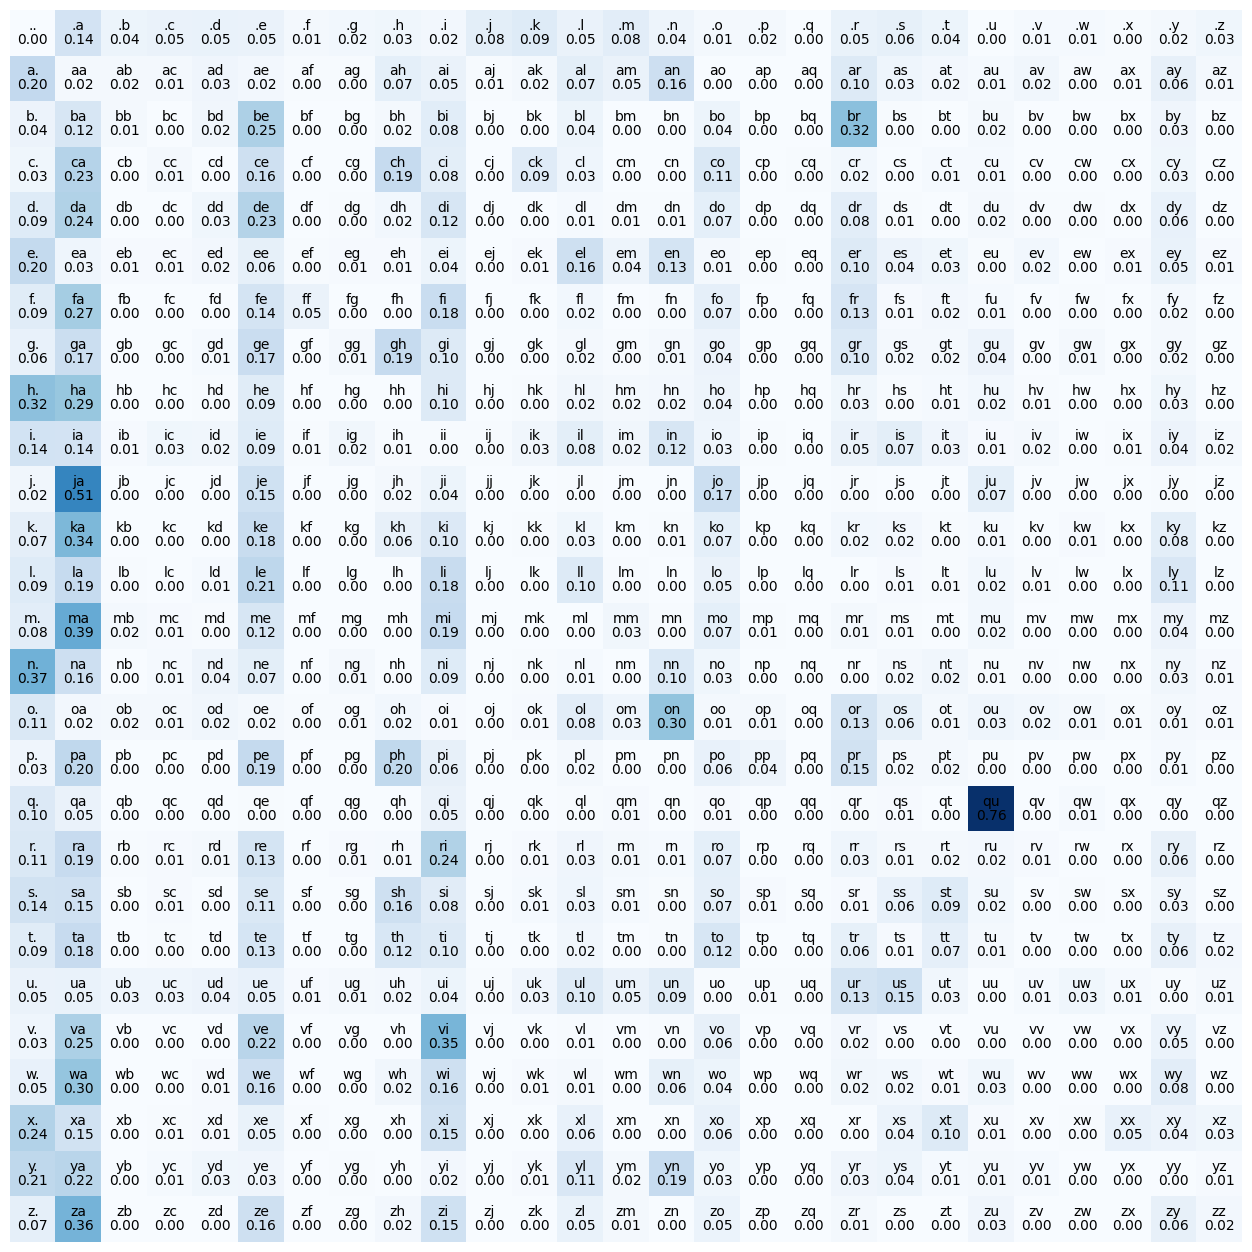

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16,16))
plt.imshow(P, cmap='Blues')
for i in range(n_chars):
    for j in range(n_chars):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='k')
        plt.text(j, i, "%.2f" % (P[i, j].item()), ha="center", va="top", color='k')
plt.axis('off');

#### OK, now we will build a model purely based on this probability table.

#### That is, staring from starting character ("."), we sample characters based on the probability given in the table, until it samples ending character (".").


#### Set a seed for generator.


In [20]:
g = torch.Generator().manual_seed(42)


#### We randomly generate 10 names.


In [21]:
for i in range(10):
    out = []
    ix = 0  # start from "."
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        if ix == 0:  # if "." is sample, finish sampling.
            break
        out.append(itos[ix])
    print("".join(out))


ya
syahavilin
dleekahmangonya
tryahe
chen
ena
da
amiiae
a
keles


#### Eeh? Do these look reasonable? Maybe, or maybe not. Our expectation is actually not high here, since it is from Bigrams.


#### Note that we used a probability table for character sampling.


#### Can we consider building a "machine", where the machine learns some patterns from data?


#### Yes.


#### Let's create dataset (X and Y) for learning. For each bigram, X is the first character and Y is the second.


In [22]:
xs, ys = [], []
for w in words:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)


In [23]:
xs, ys


(tensor([ 0,  5, 13,  ..., 25, 26, 24]),
 tensor([ 5, 13, 13,  ..., 26, 24,  0]))

In [24]:
[xs.shape, ys.shape]


[torch.Size([228146]), torch.Size([228146])]

#### But we may want to split it into training, validation, and test sets, so we shuffle names, and select 80%, 10%, and 10%.


In [25]:
def build_dataset(words):
    xs, ys = [], []
    for w in words:
        chs = ["."] + list(w) + ["."]
        for ch1, ch2 in zip(chs, chs[1:]):
            ix1 = stoi[ch1]
            ix2 = stoi[ch2]
            xs.append(ix1)
            ys.append(ix2)
    xs = torch.tensor(xs)
    ys = torch.tensor(ys)
    return xs, ys


import random

random.seed(42)
random.shuffle(words)
n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))

x_train, y_train = build_dataset(words[:n1])
x_val, y_val = build_dataset(words[n1:n2])
x_test, y_test = build_dataset(words[n2:])


In [26]:
(x_train.shape, y_train.shape), (x_val.shape, y_val.shape), (x_test.shape, y_test.shape)


((torch.Size([182625]), torch.Size([182625])),
 (torch.Size([22655]), torch.Size([22655])),
 (torch.Size([22866]), torch.Size([22866])))

#### We consider a single hidden layer neural network.


#### Here is the workflow for training (no batch here):

- init W (27 \* 27)
- encoding x: one-hot encoding (e.g., n \* 27)
- forward pass
  - logits = xenc @ W (e.g., n \* 27)
  - est_y = softmax (logits)
  - nll(est_y, y)
- backward pass
  - loss.backward()
- update
  - W.data += - lr \* W.grad


#### Init W.


In [27]:
g = torch.Generator().manual_seed(42)
W = torch.randn((27, 27), generator=g, requires_grad=True)


#### Encode X


In [28]:
import torch.nn.functional as F

x_train_enc = F.one_hot(x_train, num_classes=n_chars).float()
x_val_enc = F.one_hot(x_val, num_classes=n_chars).float()
x_test_enc = F.one_hot(x_test, num_classes=n_chars).float()


In [29]:
x_train_enc


tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [30]:
x_train_enc.shape


torch.Size([182625, 27])

#### Run training


In [31]:
def calc_loss(x, y, W):
    logits = x @ W
    counts = logits.exp()
    est_y = counts / counts.sum(1, keepdims=True)
    loss = -est_y[torch.arange(x.shape[0]), y].log().mean()
    return loss


In [32]:
list_loss_train, list_loss_val = [], []
for k in range(500):
    # forward pass
    loss_train = calc_loss(x_train_enc, y_train, W)
    loss_val = calc_loss(x_val_enc, y_val, W)

    if (k + 1) % 10 == 0:
        print(
            f"itr = {k+1}, loss_train={loss_train.item(): .4f}, loss_val={loss_val.item(): .4f}"
        )

    list_loss_train.append(loss_train.item())
    list_loss_val.append(loss_val.item())

    # backward pass
    W.grad = None
    loss_train.backward()

    # update
    W.data += -5.0 * W.grad


itr = 10, loss_train= 3.4115, loss_val= 3.4150
itr = 20, loss_train= 3.1919, loss_val= 3.1943
itr = 30, loss_train= 3.0423, loss_val= 3.0441
itr = 40, loss_train= 2.9386, loss_val= 2.9401
itr = 50, loss_train= 2.8629, loss_val= 2.8642
itr = 60, loss_train= 2.8058, loss_val= 2.8068
itr = 70, loss_train= 2.7618, loss_val= 2.7625
itr = 80, loss_train= 2.7273, loss_val= 2.7277
itr = 90, loss_train= 2.6995, loss_val= 2.6997
itr = 100, loss_train= 2.6768, loss_val= 2.6767
itr = 110, loss_train= 2.6579, loss_val= 2.6575
itr = 120, loss_train= 2.6419, loss_val= 2.6413
itr = 130, loss_train= 2.6281, loss_val= 2.6273
itr = 140, loss_train= 2.6162, loss_val= 2.6151
itr = 150, loss_train= 2.6057, loss_val= 2.6045
itr = 160, loss_train= 2.5964, loss_val= 2.5951
itr = 170, loss_train= 2.5881, loss_val= 2.5867
itr = 180, loss_train= 2.5807, loss_val= 2.5791
itr = 190, loss_train= 2.5740, loss_val= 2.5723
itr = 200, loss_train= 2.5679, loss_val= 2.5662
itr = 210, loss_train= 2.5624, loss_val= 2.5606
i

<Axes: >

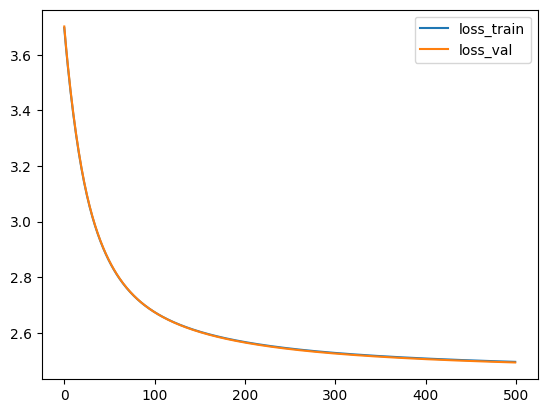

In [33]:
import pandas as pd

pd.DataFrame(
    {"loss_train": list_loss_train, "loss_val": list_loss_val}, index=range(500)
).plot()


In [34]:
loss_test = calc_loss(x_test_enc, y_test, W)
print(f"loss_test = {loss_test.item(): .4f}")


loss_test =  2.5006


In [35]:
g = torch.Generator().manual_seed(42)

In [36]:
for i in range(10):
    out = []
    ix = 0
    while True:
        x_test_enc = F.one_hot(torch.tensor([ix]), num_classes=n_chars).float()
        logits = x_test_enc @ W
        counts = logits.exp()
        p = counts / counts.sum(1, keepdims=True)
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        if ix == 0:
            break
        out.append(itos[ix])
    print("".join(out))

ya
syahavilin
dleekahmangwnya
tryahdachen
ena
da
amiiae
a
keles
ly
